# EDA and Feature Engineering of India's International Trade

For this project, i gathered data from [comtrade UN data](https://comtrade.un.org/data/) of International trades of India. next, I am going to done EDA and Feature Engineering.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

## Read Data

In [2]:
data = pd.read_csv("F:/project/India trade data project/data/data.csv")

In [3]:
data 

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2011,201108,August 2011,2,0,1,Imports,699,India,...,NaN,NaN,NaN,NaN,NaN,NaN,15177111,NaN,NaN,0
1,HS,2011,201108,August 2011,2,0,1,Imports,699,India,...,NaN,NaN,NaN,NaN,NaN,NaN,1161376497,NaN,NaN,0
2,HS,2011,201108,August 2011,4,0,1,Imports,699,India,...,NaN,NaN,NaN,NaN,NaN,NaN,190977399,NaN,NaN,0
3,HS,2011,201108,August 2011,6,1,1,Imports,699,India,...,NaN,NaN,NaN,NaN,NaN,NaN,23704,NaN,NaN,0
4,HS,2011,201108,August 2011,6,1,1,Imports,699,India,...,NaN,NaN,NaN,NaN,NaN,NaN,7057643,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4289,HS,2022,202202,February 2022,4,0,2,Exports,699,India,...,NaN,NaN,NaN,NaN,179268495.0,NaN,8362510,NaN,NaN,0
4290,HS,2022,202202,February 2022,4,0,2,Exports,699,India,...,NaN,NaN,NaN,NaN,1793937.0,NaN,7319282,NaN,NaN,0
4291,HS,2022,202202,February 2022,6,1,2,Exports,699,India,...,NaN,NaN,NaN,NaN,21801890.0,NaN,297272041,NaN,NaN,0
4292,HS,2022,202202,February 2022,6,1,2,Exports,699,India,...,NaN,NaN,NaN,NaN,212591.0,NaN,3064743,NaN,NaN,0


## Explore Data

In [4]:
data.shape

(4294, 35)

In [5]:
for c in data.columns:
  print(c, ' : ', data[c].isna().sum(), ' Missing values.')

Classification  :  0  Missing values.
Year  :  0  Missing values.
Period  :  0  Missing values.
Period Desc.  :  0  Missing values.
Aggregate Level  :  0  Missing values.
Is Leaf Code  :  0  Missing values.
Trade Flow Code  :  0  Missing values.
Trade Flow  :  0  Missing values.
Reporter Code  :  0  Missing values.
Reporter  :  0  Missing values.
Reporter ISO  :  4294  Missing values.
Partner Code  :  0  Missing values.
Partner  :  0  Missing values.
Partner ISO  :  4294  Missing values.
2nd Partner Code  :  4294  Missing values.
2nd Partner  :  4294  Missing values.
2nd Partner ISO  :  4294  Missing values.
Customs Proc. Code  :  4294  Missing values.
Customs  :  4294  Missing values.
Mode of Transport Code  :  4294  Missing values.
Mode of Transport  :  4294  Missing values.
Commodity Code  :  0  Missing values.
Commodity  :  0  Missing values.
Qty Unit Code  :  4294  Missing values.
Qty Unit  :  4294  Missing values.
Qty  :  4294  Missing values.
Alt Qty Unit Code  :  4294  Missing 

In [6]:
for c in data.columns:
  print(c, ' : ', len(data[c].unique()), ' unique values.')

Classification  :  1  unique values.
Year  :  12  unique values.
Period  :  134  unique values.
Period Desc.  :  134  unique values.
Aggregate Level  :  3  unique values.
Is Leaf Code  :  2  unique values.
Trade Flow Code  :  2  unique values.
Trade Flow  :  2  unique values.
Reporter Code  :  1  unique values.
Reporter  :  1  unique values.
Reporter ISO  :  1  unique values.
Partner Code  :  1  unique values.
Partner  :  1  unique values.
Partner ISO  :  1  unique values.
2nd Partner Code  :  1  unique values.
2nd Partner  :  1  unique values.
2nd Partner ISO  :  1  unique values.
Customs Proc. Code  :  1  unique values.
Customs  :  1  unique values.
Mode of Transport Code  :  1  unique values.
Mode of Transport  :  1  unique values.
Commodity Code  :  19  unique values.
Commodity  :  19  unique values.
Qty Unit Code  :  1  unique values.
Qty Unit  :  1  unique values.
Qty  :  1  unique values.
Alt Qty Unit Code  :  1  unique values.
Alt Qty Unit  :  1  unique values.
Alt Qty  :  1  u

## Clean Features 

#### Remove blank features and unwanted features.

In [7]:
cleaned_features = []
for col in data.columns:
    if len(data[col].unique()) != 1:
        cleaned_features.append(col)

# remove same features which gave same information as other
for col in ['Period', 'Trade Flow Code', 'Commodity Code']:
    cleaned_features.remove(col)
cleaned_features

['Year',
 'Period Desc.',
 'Aggregate Level',
 'Is Leaf Code',
 'Trade Flow',
 'Commodity',
 'Netweight (kg)',
 'Trade Value (US$)']

In [8]:
data = data[cleaned_features]
dataC = data.copy()

In [9]:
data.sample(10)

,Year,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow,Commodity,Netweight (kg),Trade Value (US$)
596,2012,June 2012,4,0,Exports,"Coal gas, water gas, producer gas and similar ...",1.700000e+02,2314
443,2012,October 2012,6,1,Imports,Copper ores and concentrates,3.180800e+07,208202178
2675,2018,July 2018,6,1,Exports,Copper ores and concentrates,2.430000e+05,47680
2618,2019,April 2019,6,1,Exports,Vehicles; compression-ignition internal combus...,2.607201e+06,35978029
3947,2021,January 2021,6,1,Imports,"Sucrose; chemically pure, not containing added...",1.196537e+06,1235111
953,2013,May 2013,4,0,Exports,"Coke and semi-coke; of coal, lignite or peat, ...",2.835000e+06,548870
2880,2017,June 2017,4,0,Imports,"Coal; briquettes, ovoids and similar solid fue...",1.535597e+10,1604549519
2789,2017,April 2017,6,1,Imports,Vehicles; compression-ignition internal combus...,2.294590e+05,2815685
3958,2021,February 2021,6,1,Exports,"Sucrose; chemically pure, not containing added...",4.188733e+08,171631643
3527,2019,December 2019,2,0,Imports,Iron and steel,0.000000e+00,722054523


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4294 entries, 0 to 4293
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4294 non-null   int64  
 1   Period Desc.       4294 non-null   object 
 2   Aggregate Level    4294 non-null   int64  
 3   Is Leaf Code       4294 non-null   int64  
 4   Trade Flow         4294 non-null   object 
 5   Commodity          4294 non-null   object 
 6   Netweight (kg)     3061 non-null   float64
 7   Trade Value (US$)  4294 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 268.5+ KB


In [11]:
data.describe()

,Year,Aggregate Level,Is Leaf Code,Netweight (kg),Trade Value (US$)
count,4294.000000,4294.000000,4294.000000,3.061000e+03,4.294000e+03
mean,2016.046111,4.204471,0.351653,7.443441e+08,1.750726e+08
std,3.235996,1.537214,0.477542,3.340860e+09,3.659018e+08
min,2011.000000,2.000000,0.000000,0.000000e+00,2.000000e+00
25%,2013.000000,4.000000,0.000000,1.668200e+04,2.301980e+06
50%,2016.000000,4.000000,0.000000,2.234025e+06,1.258722e+07
75%,2019.000000,6.000000,1.000000,1.199679e+08,1.484193e+08
max,2022.000000,6.000000,1.000000,3.358176e+10,3.530998e+09


##### Create month_year from Period Desc.
e.g January 2011 to 01-2011

In [12]:
data['month_year'] = pd.to_datetime(data['Period Desc.'], format='%B %Y').dt.to_period('M')
data.drop(columns=['Period Desc.'], inplace=True)
data = data.sort_values(by='month_year', axis=0)

In [13]:
data.head()

,Year,Aggregate Level,Is Leaf Code,Trade Flow,Commodity,Netweight (kg),Trade Value (US$),month_year
246,2011,4,0,Imports,"Portland cement, aluminous cement (""ciment fon...",73031339.0,5431895,2011-01
244,2011,2,0,Exports,Fertilizers,NaN,4189484,2011-01
98,2011,6,1,Exports,"Sucrose; chemically pure, containing added fla...",2981970.0,2213829,2011-01
99,2011,4,0,Exports,"Coke and semi-coke; of coal, lignite or peat, ...",76234000.0,29775457,2011-01
100,2011,6,1,Exports,Vehicles; compression-ignition internal combus...,NaN,4131897,2011-01


In [14]:
commodity = [f for f in data['Commodity'].unique()]
commodity_map = ['oil seeds', 'Iron and steel', 'small semiconductor devices', 'SI vehicles(1500-2500)', 'CI vehicles(1500-2500)', 'milk and cream', 'sea animals', 'raw sugar', 'sugar', 'flavoured sugar', 'Portland cement', 'Cement clinkers', 'Precious metal', 'coal', 'coke', 'Fertilizers', 'Paints & varnishes', 'copper ore', 'coal gas']
commodity_map = dict(zip(commodity, commodity_map))

In [15]:
data['Commodity'] = data['Commodity'].apply(lambda x: commodity_map[x])

In [16]:
data['Is Leaf Code'].value_counts()

0    2784
1    1510
Name: Is Leaf Code, dtype: int64

### Missing Values

Is there any missing values?

In [17]:
data.isnull().sum()

Year                    0
Aggregate Level         0
Is Leaf Code            0
Trade Flow              0
Commodity               0
Netweight (kg)       1233
Trade Value (US$)       0
month_year              0
dtype: int64

<AxesSubplot:>

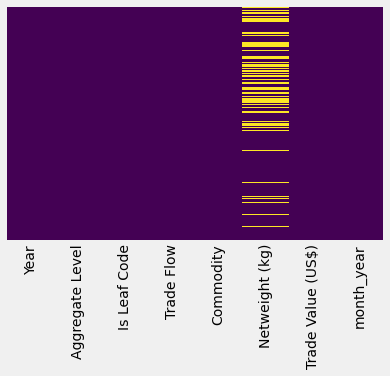

In [18]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

only Netweight(kg) has missing values.

### Explore Features

<b>Trade Flow</b>

Text(0.5, 1.0, 'Mean Trade Values in Billion USD')

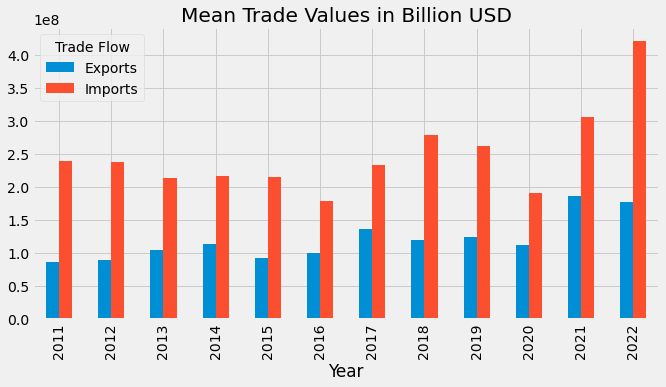

In [19]:
pd.DataFrame(data[['Commodity']].value_counts(sort=False))
df = data.groupby(['Year', 'Trade Flow'])['Trade Value (US$)'].mean().unstack()    # used mean not sum because 2022 data is incomplete as its on-going year.
df.plot(kind='bar', figsize=(10,5))
plt.title('Mean Trade Values in Billion USD')

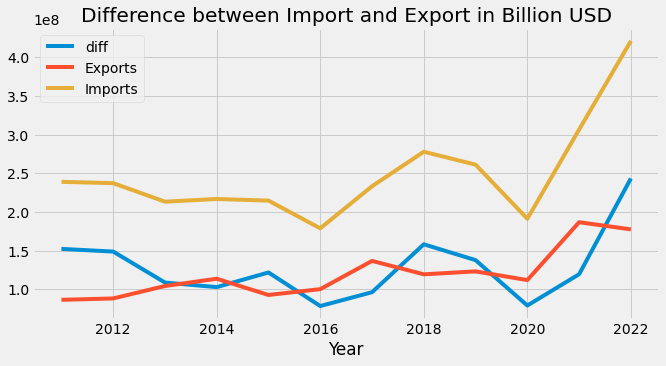

In [20]:
df['diff'] = df['Imports'] - df['Exports']
plt.figure(figsize=(10,5))
df['diff'].plot()
df['Exports'].plot()
df['Imports'].plot()
plt.title('Difference between Import and Export in Billion USD')
plt.legend()

Imports increasing faster than Exports.

<b>Commodity</b>

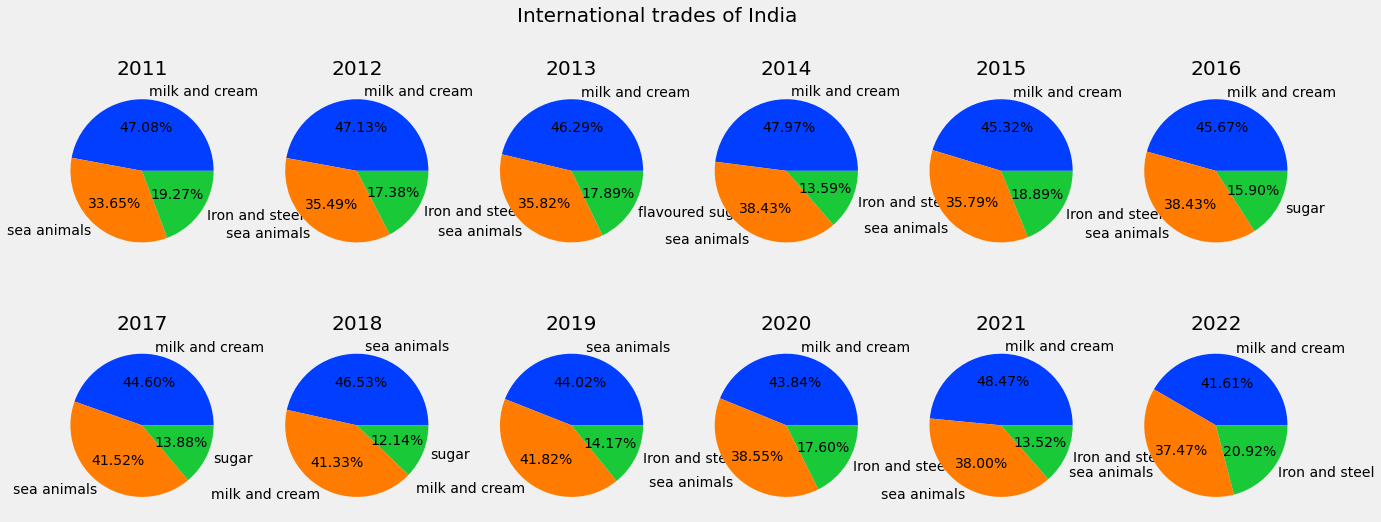

In [21]:
df = data.groupby(['Year', 'Commodity'])['Trade Value (US$)'].sum().unstack().fillna(0)
palette_color = sns.color_palette('bright')

top_n=3
plt.figure(figsize=(20,8))
plt.suptitle('International trades of India', size=20)
for i, year in enumerate(range(2011, 2023)):
    plt.subplot(2, 6, i+1)
    labels = df.loc[year].sort_values(ascending=False).keys()[:top_n]
    values = df.loc[year].sort_values(ascending=False).values[:top_n]
    plt.pie(values, labels=labels, autopct='%1.2f%%', colors=palette_color)
    plt.title(str(year))

plt.show()

mostly international trades of india in every year is iron and steel followed by coal and fertilizers.\
in year 2016, 2017, 2018, sea animals trades are on top percent. 

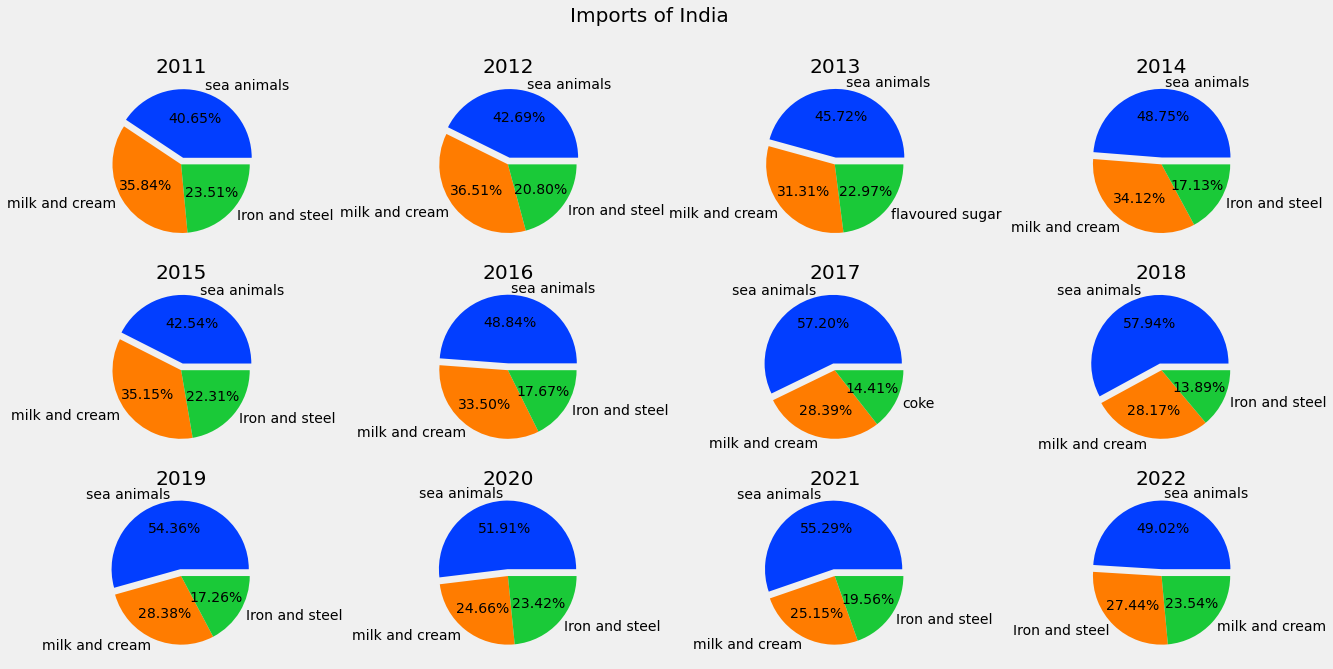

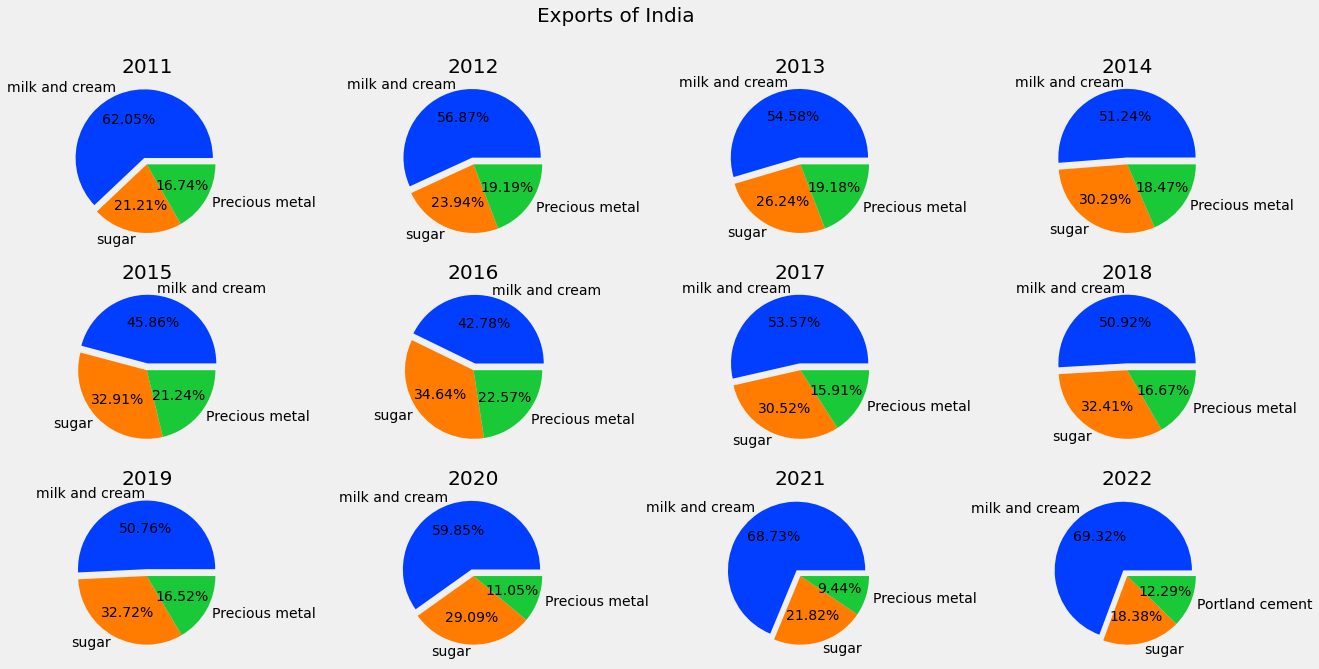

In [28]:
df_ = data.groupby(['Year', 'Commodity', 'Trade Flow'])['Trade Value (US$)'].sum().unstack().fillna(0).unstack()

df = df_['Imports']
top_n=3
plt.figure(figsize=(20,10))
plt.suptitle('Imports of India', size=20)
for i, year in enumerate(range(2011, 2023)):
    plt.subplot(3, 4, i+1)
    labels = df.loc[year].sort_values(ascending=False).keys()[:top_n]
    values = df.loc[year].sort_values(ascending=False).values[:top_n]
    plt.pie(values, labels=labels, autopct='%1.2f%%', colors=palette_color, explode=(0.1,0,0))
    plt.title(str(year))
plt.show()
print()
df = df_['Exports']
top_n=3
plt.figure(figsize=(20,10))
plt.suptitle('Exports of India', size=20)
for i, year in enumerate(range(2011, 2023)):
    plt.subplot(3, 4, i+1)
    labels = df.loc[year].sort_values(ascending=False).keys()[:top_n]
    values = df.loc[year].sort_values(ascending=False).values[:top_n]
    plt.pie(values, labels=labels, autopct='%1.2f%%', colors=palette_color, explode=(0.1,0,0))
    plt.title(str(year))

plt.show()


most of imports, of india are Coal followed by iron and steel then fertilizers.
most of exports of india are Iron and Steel then sea animals then SI vehicles(1500-2500cc).

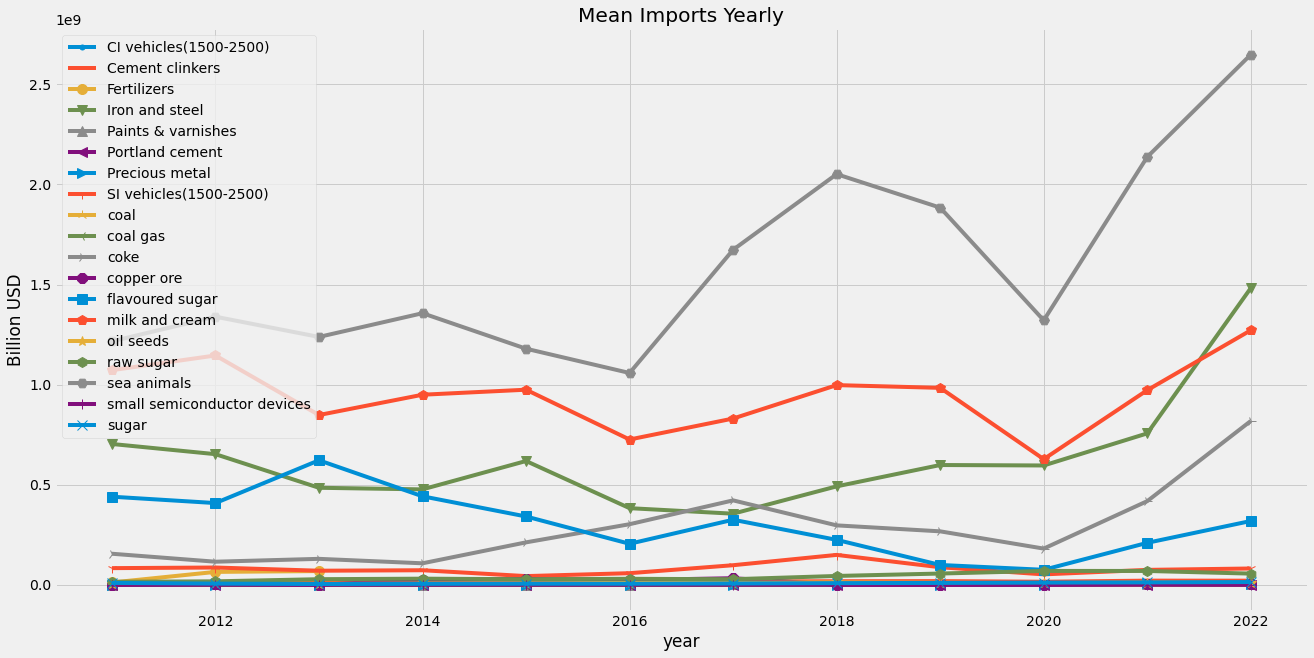

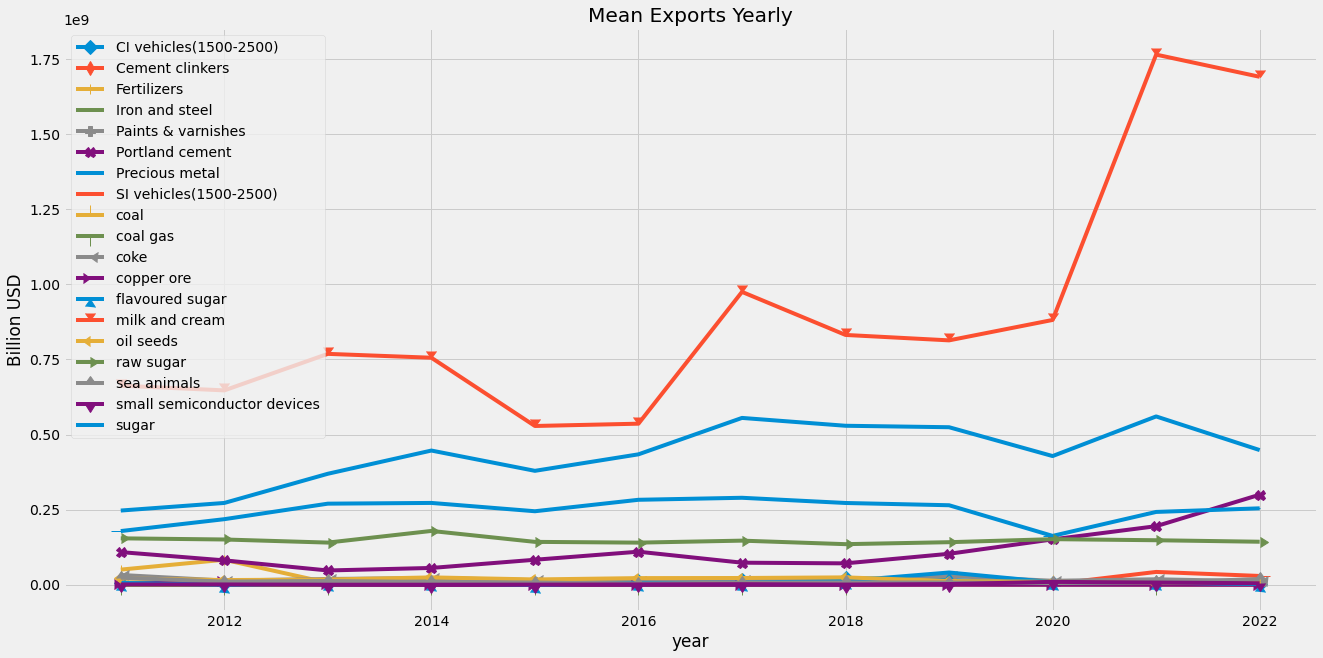

In [132]:
from matplotlib.lines import Line2D
import itertools


markers = itertools.cycle(Line2D.markers.keys()) 

df_ = data.groupby(['Year', 'Commodity', 'Trade Flow'])['Trade Value (US$)'].mean().unstack().fillna(0).unstack()

commodities = list(df_['Imports'].columns)

plt.figure(figsize=(20,10))
for comm in commodities:
    df_['Imports'][comm].plot(marker=next(markers), title=comm, markersize=10)
plt.ylabel('Billion USD')
plt.xlabel('year')
plt.title('Mean Imports Yearly')
plt.legend(loc=2)
plt.show()

plt.figure(figsize=(20,10))
for comm in commodities:
    df_['Exports'][comm].plot(marker=next(markers), title=comm, markersize=10)
plt.ylabel('Billion USD')
plt.xlabel('year')
plt.title('Mean Exports Yearly')
plt.legend(loc=2)
plt.show()


<b>Import</b> <br>
coal import increasing heavily from last three years.<br> Fertilizers import increases. <br> Iron and steel import decreasing <br> mean Imports of sea animals is highest. <br>
<b>Export</b> <br>
iron and steel export increasing heavily from last three years. <br> export of flavoured sugar is increasing.<br> mean Export of milk and cream is highest. 

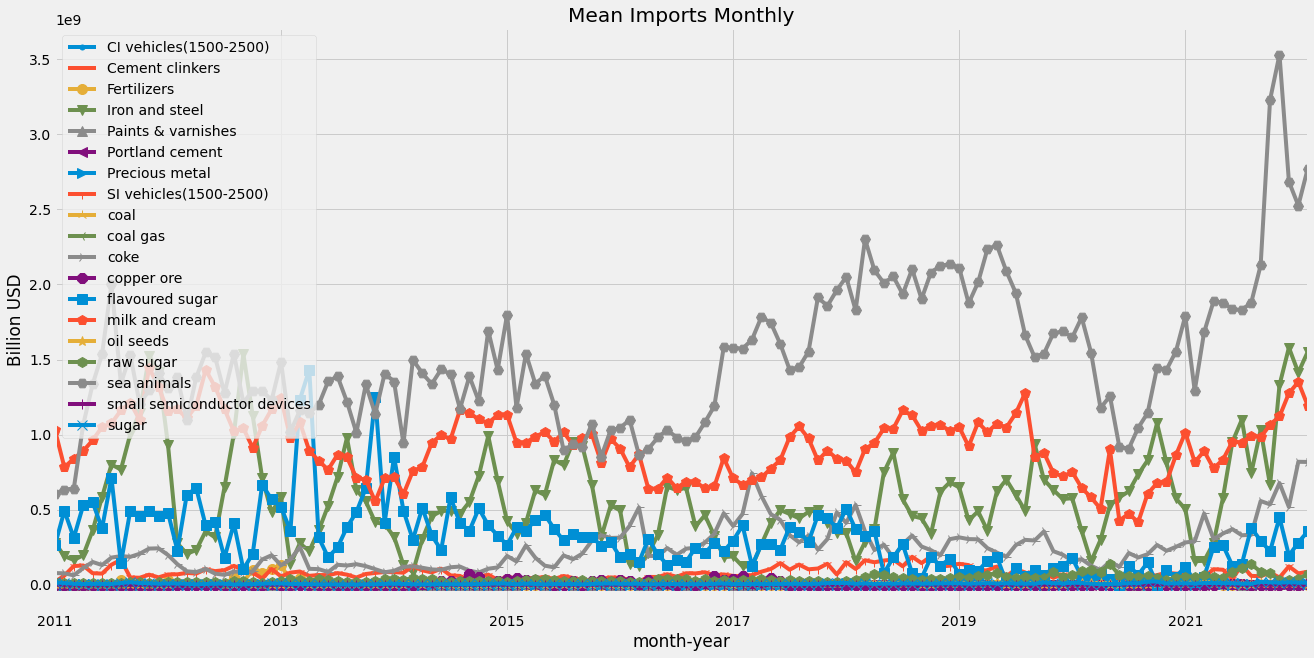

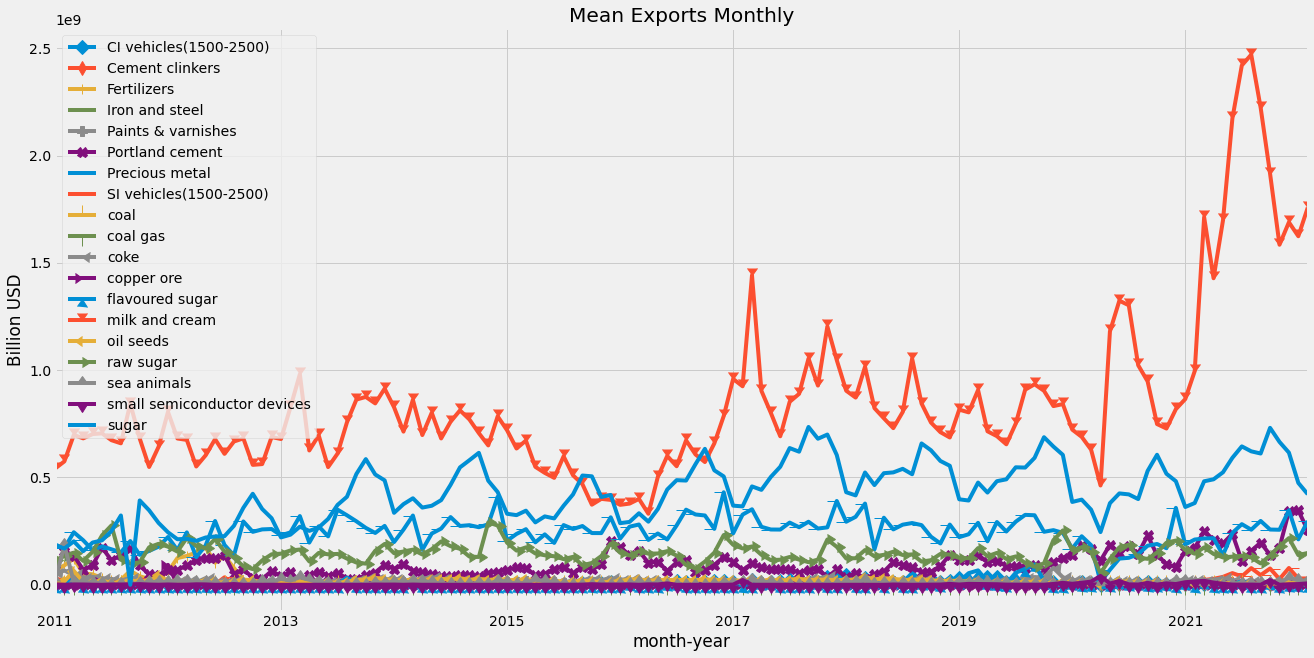

In [133]:
from matplotlib.lines import Line2D
import itertools

markers = itertools.cycle(Line2D.markers.keys()) 

df_ = data.groupby(['month_year', 'Commodity', 'Trade Flow'])['Trade Value (US$)'].mean().unstack().unstack().fillna(0)
commodities = list(df_['Imports'].columns)

plt.figure(figsize=(20,10))
for comm in commodities:
    df_['Imports'][comm].plot(marker=next(markers), title=comm, markersize=10)
plt.ylabel('Billion USD')
plt.xlabel('month-year')
plt.title('Mean Imports Monthly')
plt.legend(loc=2)
plt.show()

plt.figure(figsize=(20,10))
for comm in commodities:
    df_['Exports'][comm].plot(marker=next(markers), title=comm, markersize=10)
plt.ylabel('Billion USD')
plt.xlabel('month-year')
plt.title('Mean Exports Monthly')
plt.legend(loc=2)
plt.show()


#### Correlation between Commodity and trade flow

In [134]:
df_= data.groupby(['month_year', 'Commodity', 'Trade Flow'])['Trade Value (US$)'].mean().unstack().fillna(0).unstack().corr()
for i, row in df_[(df_.abs() >= 0.6) & (df_.abs() != 1)].iterrows():
    cv =  row.dropna().values
    if cv != []:
        print(tuple(i),' : ', tuple(row.dropna().index), cv)
        print('-----------------------------------')

('Exports', 'Cement clinkers')  :  (('Exports', 'milk and cream'), ('Exports', 'sugar'), ('Imports', 'Cement clinkers'), ('Imports', 'raw sugar'), ('Imports', 'sea animals')) [0.63951614 0.60822924 0.77839975 0.66076577 0.6083112 ]
-----------------------------------
('Exports', 'SI vehicles(1500-2500)')  :  (('Exports', 'milk and cream'), ('Imports', 'Precious metal')) [0.64391743 0.67807224]
-----------------------------------
('Exports', 'milk and cream')  :  (('Exports', 'Cement clinkers'), ('Exports', 'SI vehicles(1500-2500)'), ('Imports', 'Precious metal')) [0.63951614 0.64391743 0.71392667]
-----------------------------------
('Exports', 'sugar')  :  (('Exports', 'Cement clinkers'), ('Imports', 'Cement clinkers')) [0.60822924 0.60449092]
-----------------------------------
('Imports', 'Cement clinkers')  :  (('Exports', 'Cement clinkers'), ('Exports', 'sugar'), ('Imports', 'sea animals')) [0.77839975 0.60449092 0.61735256]
-----------------------------------
('Imports', 'Preciou

Import of Portland cement highly correlated to Import Cement clinkers. \
Import of SI vehicles(1500-2500) correlated to Export of Iron and steel & coke.  \
Import of Paints & varnishes & Export of Paints & varnishes.

<AxesSubplot:xlabel='Trade Flow-Commodity', ylabel='Trade Flow-Commodity'>

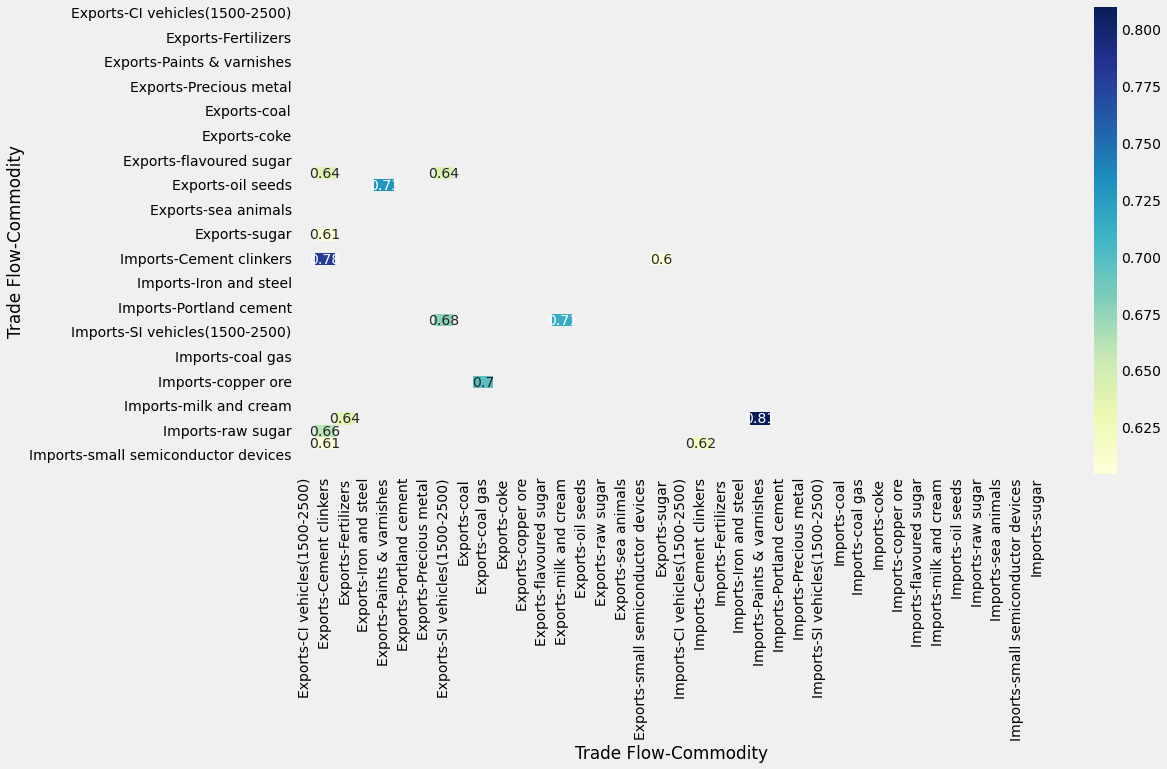

In [135]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(df_, dtype=bool))
sns.heatmap(df_[df_.abs() >= 0.6], cmap='YlGnBu', annot=True, mask=mask)

In [136]:
data.head()

,Year,Aggregate Level,Is Leaf Code,Trade Flow,Commodity,Netweight (kg),Trade Value (US$),month_year
246,2011,4,0,Imports,oil seeds,73031339.0,5431895,2011-01
244,2011,2,0,Exports,Iron and steel,NaN,4189484,2011-01
98,2011,6,1,Exports,small semiconductor devices,2981970.0,2213829,2011-01
99,2011,4,0,Exports,SI vehicles(1500-2500),76234000.0,29775457,2011-01
100,2011,6,1,Exports,CI vehicles(1500-2500),NaN,4131897,2011-01


### Exploring Null Value

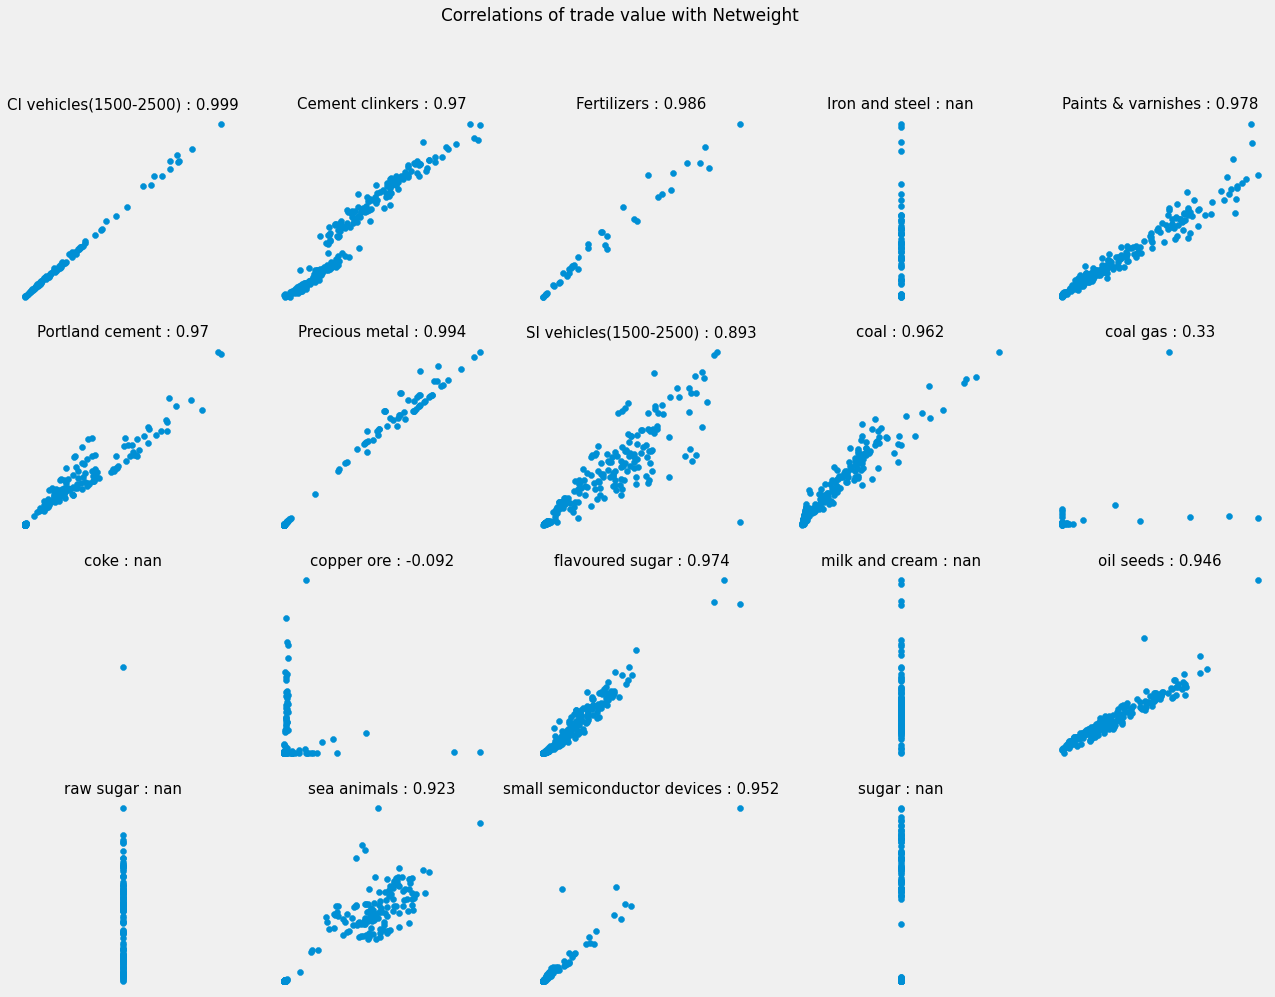

In [137]:
df = data.dropna(axis=0)
df = df.groupby('Commodity')
plt.figure(figsize=(20,15))
i=1
for commodity, g in df:
    corr = g[['Netweight (kg)', 'Trade Value (US$)']].corr().iloc[:,0].round(3).min()
    plt.subplot(4, 5, i)
    plt.scatter(x = g['Netweight (kg)'], y = g['Trade Value (US$)'])
    plt.xticks([])
    plt.yticks([])
    plt.axis('on')
    plt.title(f"{commodity} : {corr}", fontdict={'fontsize':15})
    i+=1

plt.suptitle('Correlations of trade value with Netweight')
plt.show()

In [138]:
nan_corr = ['Fertilizers', 'Iron and steel', 'oil seeds', 'sea animals', 'small semiconductor devices']
low_corr = ['Precious metal', 'coal gas']
high_corr = set(data['Commodity'].unique())-set(low_corr)-set(nan_corr)

Fertilizers, Iron and Steel, oil seeds, sea animals and small semiconductor devices have nan correlation meaning constant Netweight (kg).


In [139]:
data.head()

,Year,Aggregate Level,Is Leaf Code,Trade Flow,Commodity,Netweight (kg),Trade Value (US$),month_year
246,2011,4,0,Imports,oil seeds,73031339.0,5431895,2011-01
244,2011,2,0,Exports,Iron and steel,NaN,4189484,2011-01
98,2011,6,1,Exports,small semiconductor devices,2981970.0,2213829,2011-01
99,2011,4,0,Exports,SI vehicles(1500-2500),76234000.0,29775457,2011-01
100,2011,6,1,Exports,CI vehicles(1500-2500),NaN,4131897,2011-01


#### Price per Ton Analysis

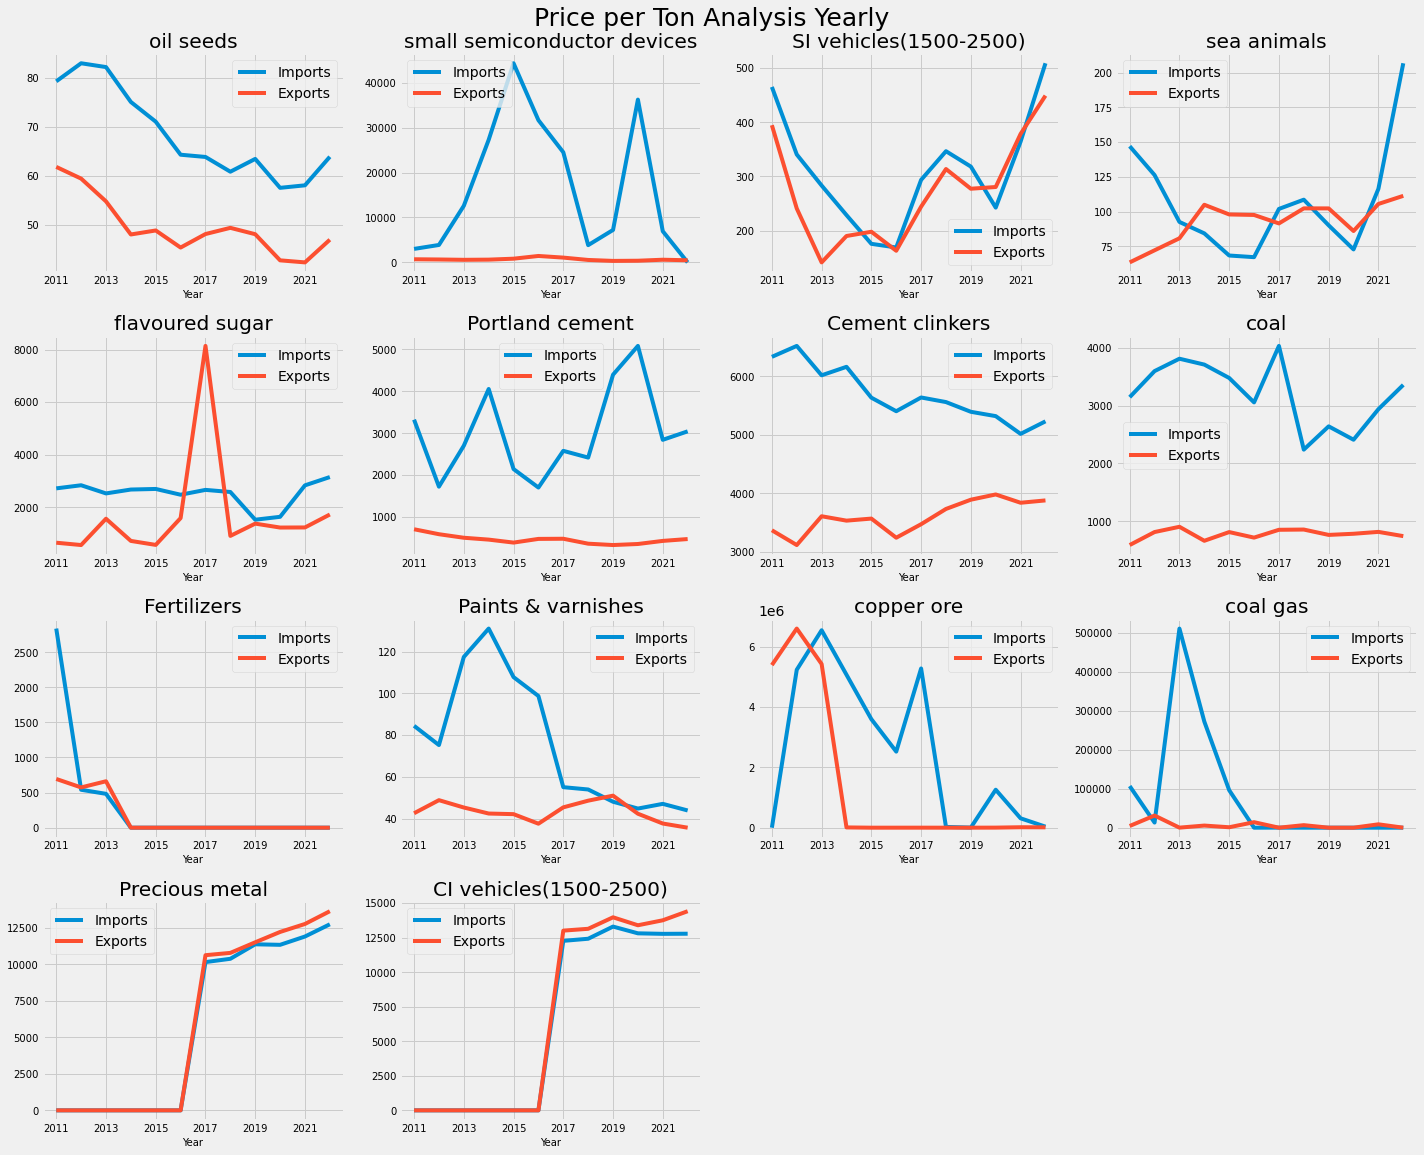

In [140]:
df = data.copy()
df = df[df['Netweight (kg)'].notnull()]
commodities = list(df['Commodity'].unique())
df['price per ton'] = df['Trade Value (US$)'] / (df['Netweight (kg)']/1000)
df = df.groupby(['Year', 'Commodity', 'Trade Flow'])['price per ton'].mean().unstack().fillna(0).unstack().fillna(0)#.reset_index()

i=1
plt.figure(figsize=(20,20))
for n in commodities:
    if n in ['Iron and steel', 'coke', 'milk and cream', 'raw sugar', 'sugar']:  # these commodities have most of missing values so no need to plot them.
        continue
        
    try:
        ax=plt.subplot(5, 4, i)
        df['Imports'].reset_index().plot(x='Year', y=n, kind='line', title=n, fontsize=10, label='Imports', ax=ax)
        df['Exports'].reset_index().plot(x='Year', y=n, kind='line', title=n, fontsize=10, label='Exports', ax=ax)
        ax.xaxis.label.set_size(10)
        ax.set_xticks(list(range(2011,2023, 2)))
    except:
        continue
    i+=1

plt.suptitle('Price per Ton Analysis Yearly', fontsize=25)
f = plt.gcf()
f.tight_layout()
plt.show()

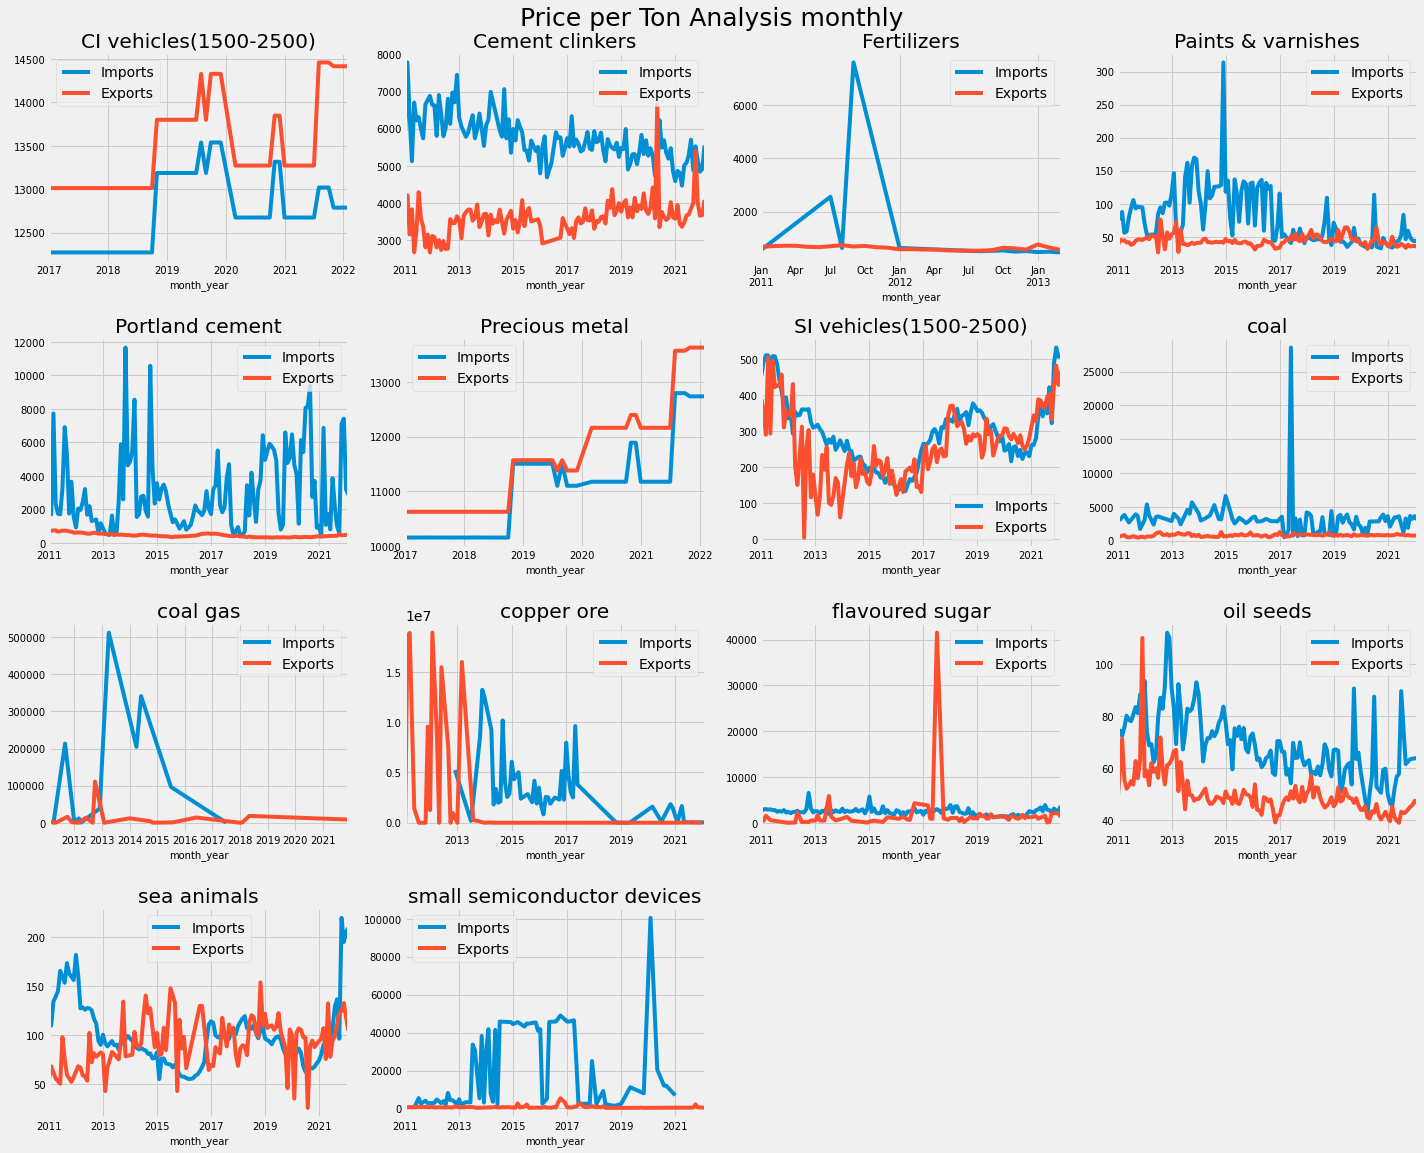

In [141]:
df = data.copy()
df = df[df['Netweight (kg)'].notnull()]

i=1
plt.figure(figsize=(20,20))
for n,df in df.groupby(['Commodity']):
    df['price per ton'] = df['Trade Value (US$)'] / (df['Netweight (kg)']/1000)
    if n in ['Iron and steel', 'coke', 'milk and cream', 'raw sugar', 'sugar']:  # these commodities have most of missing values so no need to plot them.
        continue
        
    try:
        ax=plt.subplot(5, 4, i)
        df[df['Trade Flow']=='Imports'].plot(x='month_year', y='price per ton', kind='line', title=n, fontsize=10, label='Imports', ax=ax)
        df[df['Trade Flow']=='Exports'].plot(x='month_year', y='price per ton', kind='line', title=n, fontsize=10, label='Exports', ax=ax)
        ax.xaxis.label.set_size(10)
    except:
        continue
    i+=1

plt.suptitle('Price per Ton Analysis monthly', fontsize=25)
f = plt.gcf()
f.tight_layout()
plt.show()

Iron and steel, coke, milk and cream, raw sugar, sugar has majority missing values.<br>
Coal, Fertilizers, small semi conductor devices, portland cement's Export price per ton remains static compare to Import.<br>
CI vehicles and precious metal's Import and Export price are strongly correlated.<br>
cement clinkers difference between export and import prizes in reducing. <br>
coal Import, flavoured sugar Export's prize spiked around 2017-2018.<br>
small semiconductor devices import prize spiked near 2020.

### Is Leaf Code 

<AxesSubplot:xlabel='Year'>

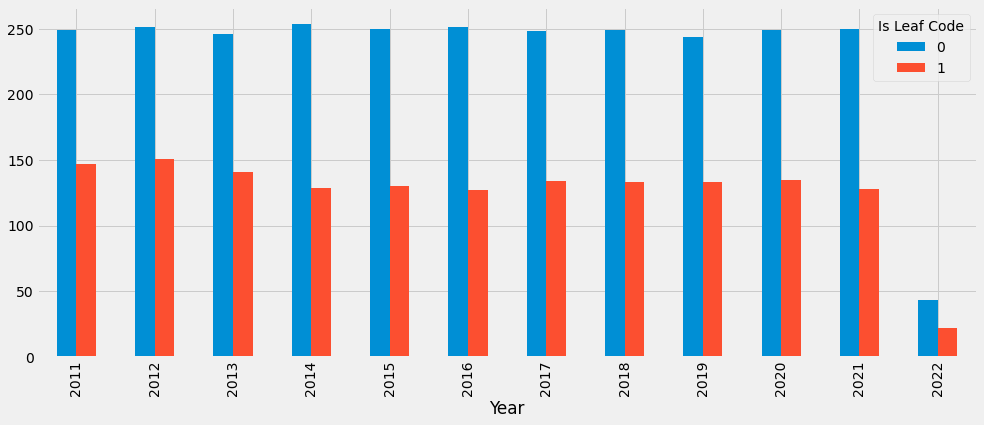

In [142]:
df = data.copy()
df.groupby(['Year', 'Is Leaf Code']).size().unstack().plot(kind='bar',figsize=(15,6))

<AxesSubplot:xlabel='Year'>

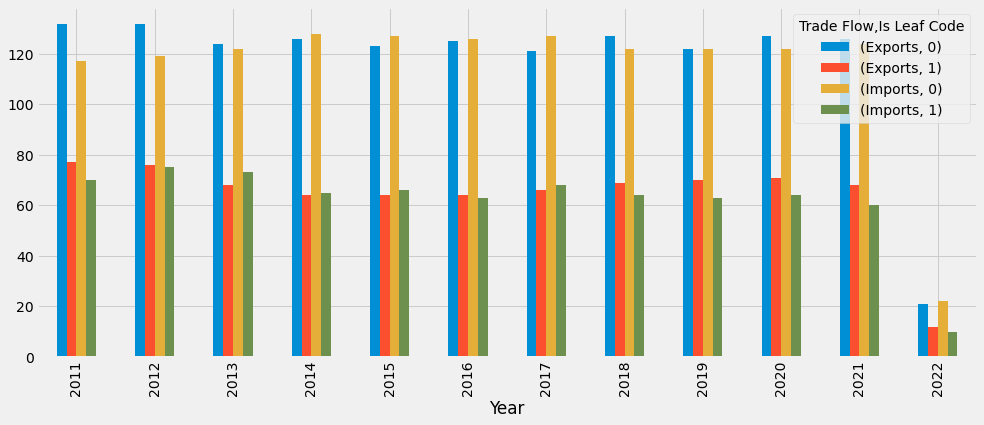

In [143]:
df = data.copy()
df.groupby(['Year', 'Is Leaf Code', 'Trade Flow']).size().unstack().unstack().plot(kind='bar', figsize=(15,6))

Text(0.5, 1.0, 'Is Leaf Code vs Trade Flow')

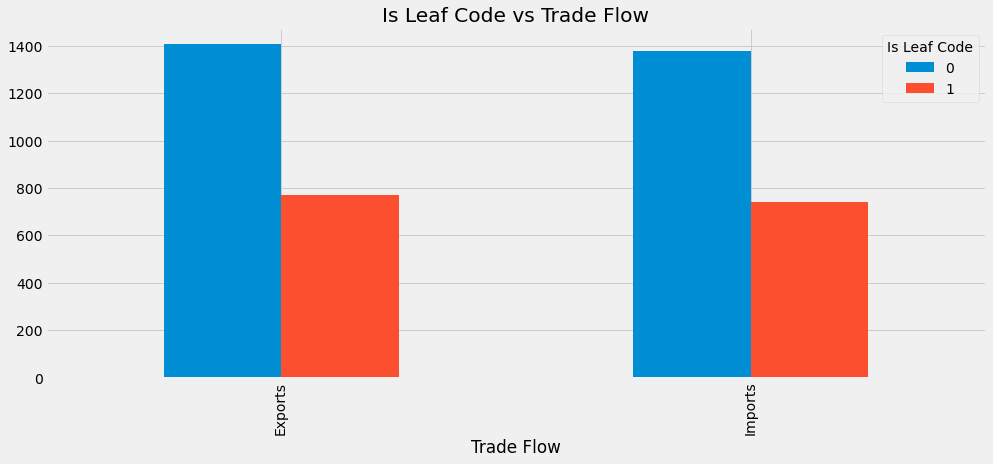

In [144]:
data.groupby(['Trade Flow', 'Is Leaf Code']).size().unstack().plot(kind='bar', figsize=(15, 6))
plt.title('Is Leaf Code vs Trade Flow')

Leaf code occures almost same for all trade flows.

Text(0.5, 1.0, 'Is Leaf Code vs month')

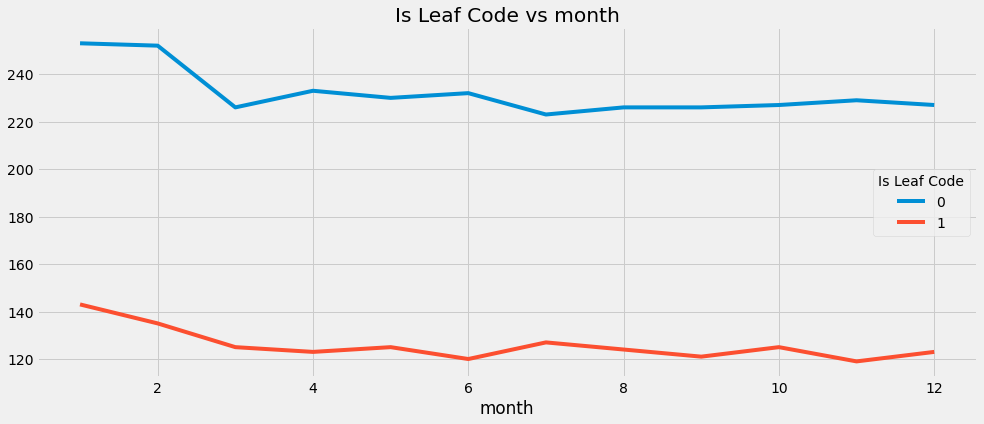

In [145]:
df = data.copy()
df['month'] = df['month_year'].dt.month
df.groupby(['month', 'Is Leaf Code']).size().unstack().plot(kind='line', figsize=(15,6))
plt.title('Is Leaf Code vs month')

leaf code decrease from january to december.

Text(0.5, 1.0, 'Is Leaf Code vs commodity')

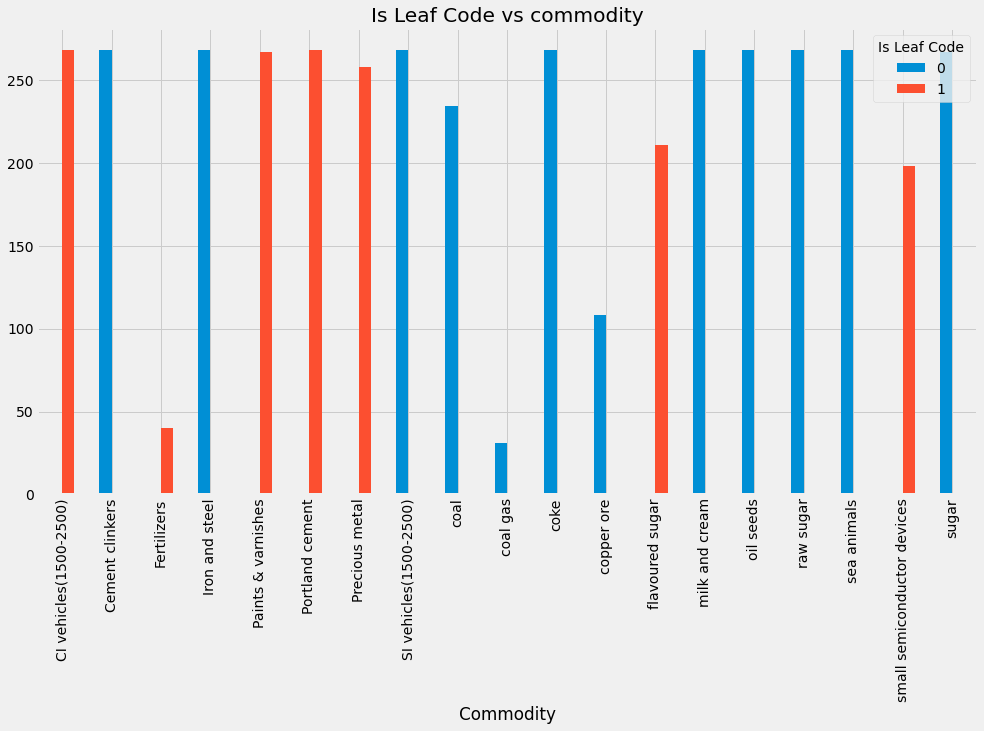

In [146]:
data.groupby(['Commodity', 'Is Leaf Code']).size().unstack().plot(kind='bar', figsize=(15,8))
plt.title('Is Leaf Code vs commodity')

Leaf Code occures at CI vehicles(1500-2500), Cement clinkers, SI vehicles(1500-2500), copper ore, flavoured sugar, raw sugar, sugar commodity.

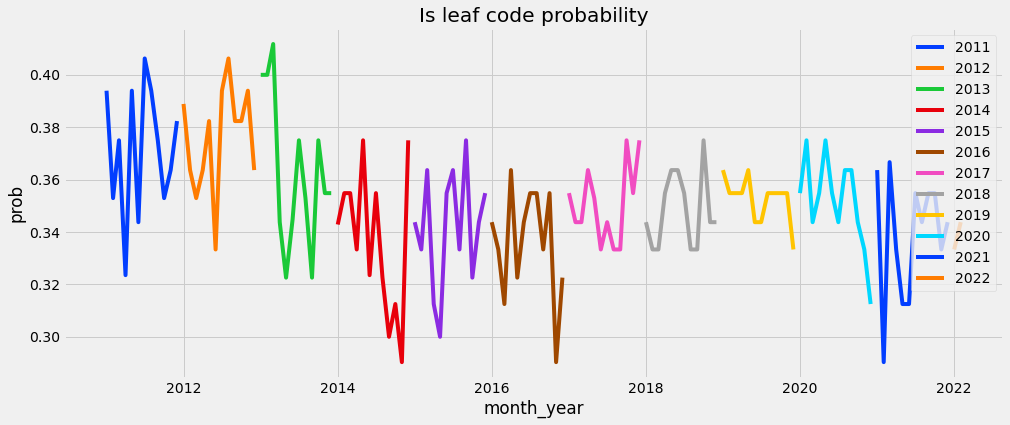

In [147]:
data = data.reset_index(drop=True)
df = data.groupby(['month_year', 'Is Leaf Code']).size().unstack()
df['prob'] = df[1]/(df[0]+df[1])
df = df.reset_index()
df['year'] = df['month_year'].dt.year
df['month_year'] = df['month_year'].dt.to_timestamp('s')
palette = sns.color_palette("bright", 12)
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='month_year', y='prob', hue='year', palette=palette)
plt.title('Is leaf code probability')
plt.legend(loc=1)

#### Aggregate Level

Text(0.5, 1.0, 'Aggregate Level')

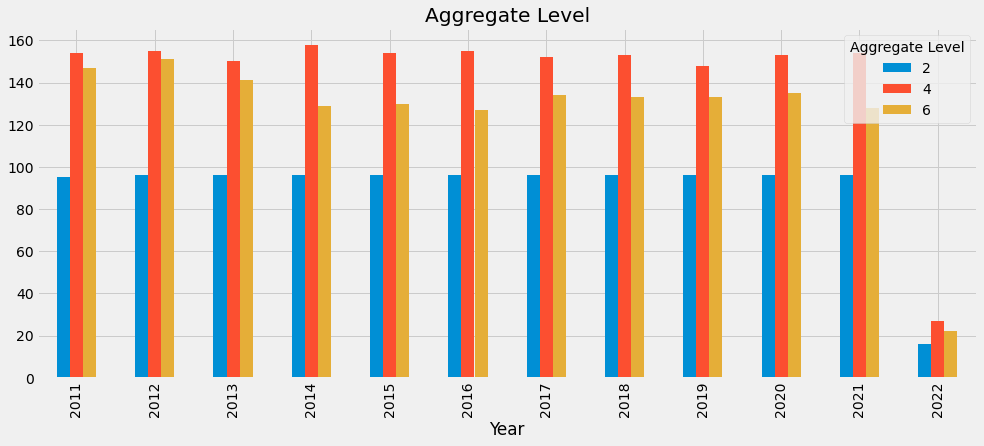

In [148]:
data.groupby(['Year', 'Aggregate Level']).size().unstack().plot(kind='bar', figsize=(15,6))
plt.title('Aggregate Level')

Text(0.5, 1.0, 'Aggregate Level')

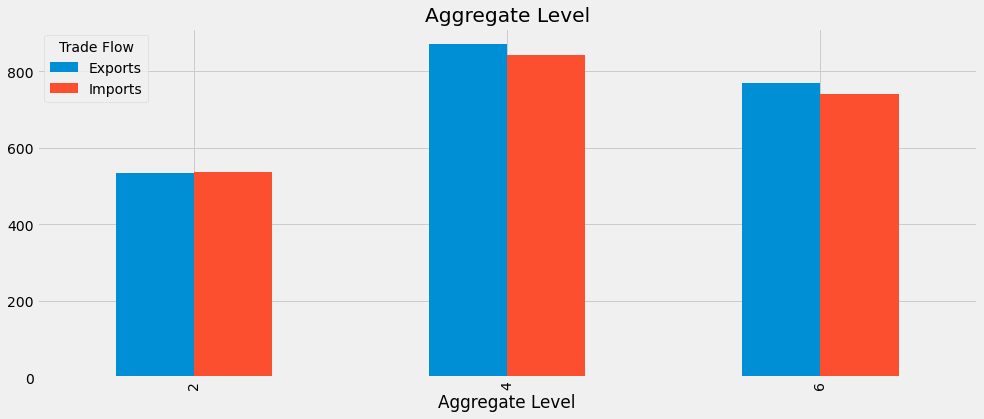

In [149]:
data.groupby(['Aggregate Level', 'Trade Flow']).size().unstack().plot(kind='bar', figsize=(15,6))
plt.title('Aggregate Level')

### Trade Value (USD)

Skew value :  3.128699865986669


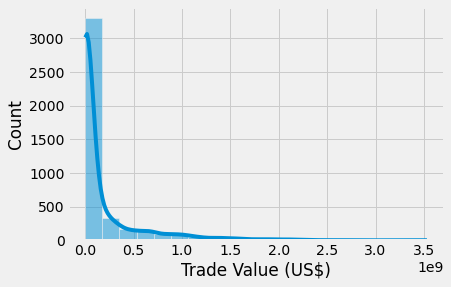

In [150]:
sns.histplot(data, x='Trade Value (US$)', bins=20, kde=True)
print('Skew value : ', data['Trade Value (US$)'].skew())

trade value is right skewed.

after transforming Skew value :  -0.047537483376495326


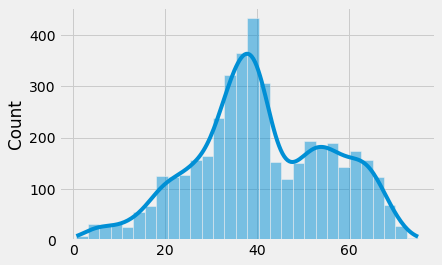

In [151]:
from scipy.stats import boxcox
df = data.copy()
transformed_trade_value = pd.Series(boxcox(df['Trade Value (US$)'])[0])
sns.histplot(transformed_trade_value, kde=True)
print('after transforming Skew value : ', transformed_trade_value.skew())

after applying boxcox transformation now trade value has skewness near zero.

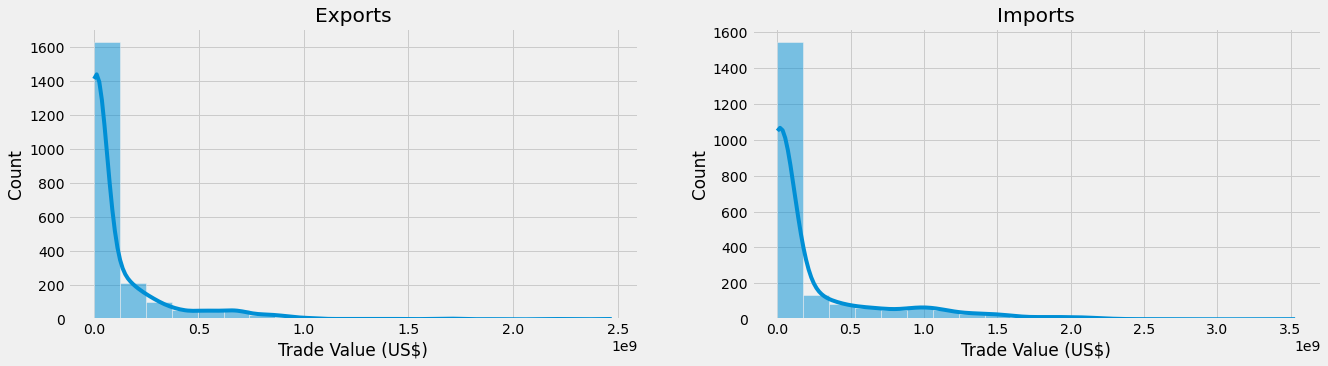

In [152]:
i=1
plt.figure(figsize=(20,5))
for name, g in data.groupby('Trade Flow')['Trade Value (US$)']: #.plot(kind='hist', subplots=True, layout=(1,2))
    plt.subplot(1, 2, i)
    sns.histplot(g, kde=True, bins=20)
    plt.title(name)
    i+=1
plt.show()

### Feature Engineering

In [153]:
data.drop(columns = ['Year'], inplace=True)

##### USD to Billion USD

In [154]:
data['Trade Value (US$)'] = data['Trade Value (US$)']/1e8

##### Converting Netweight (kg to ton)

In [155]:
data['Netweight (ton)'] = data['Netweight (kg)']/1000
data.drop(columns=['Netweight (kg)'], inplace=True)

##### Filling Null Value

In [156]:
map_dict = {}
df_notnull_ = data[data['Netweight (ton)'].notnull()].groupby('Commodity')
for commodity, df in df_notnull_:
    if commodity in high_corr:
        m, b = np.polyfit(df['Trade Value (US$)'], df['Netweight (ton)'], 1)
        map_dict[commodity] = lambda x: m*x+b 
    else: 
        map_dict[commodity] = lambda x: df['Netweight (ton)'].mean()
    

In [157]:
df_null = data[data['Netweight (ton)'].isnull()]
df_notnull = data[data['Netweight (ton)'].notnull()]
filled_ = []
for i, r in df_null.iterrows():
    filled_.append(map_dict[r['Commodity']](r['Trade Value (US$)']))
df_null['Netweight (ton)'] = filled_
df_null['Netweight (ton)'] = df_null['Netweight (ton)'].round(2)+1
data = pd.concat([df_notnull, df_null], axis=0)

##### Transforming Trade Value

before skewness : 3.1286998659866696
after skewness : -0.047537495104599564


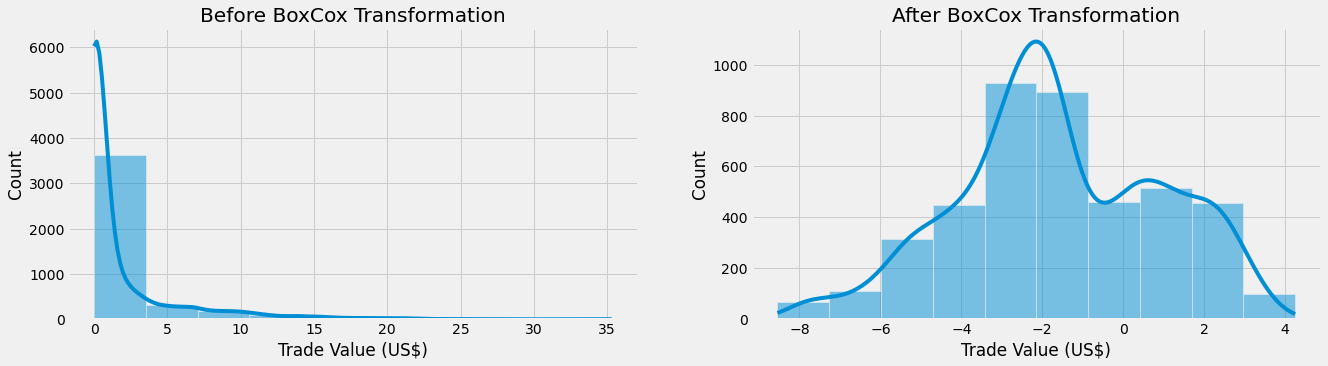

In [158]:
print('before skewness :', data['Trade Value (US$)'].skew())
_, axs = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(data=data['Trade Value (US$)'],ax=axs[0], kde=True, bins=10)
axs[0].set_title('Before BoxCox Transformation')
transformed_ = boxcox(data['Trade Value (US$)'])
lambda_trade_value = transformed_[1]
data['Trade Value (US$)'] = transformed_[0]
sns.histplot(data=data['Trade Value (US$)'],ax=axs[1], kde=True, bins=10)
axs[1].set_title('After BoxCox Transformation')

print('after skewness :', data['Trade Value (US$)'].skew())

##### Transforming Netweight (ton)

before skewness : 6.104362458251736
after skewness : 0.1962655784165069


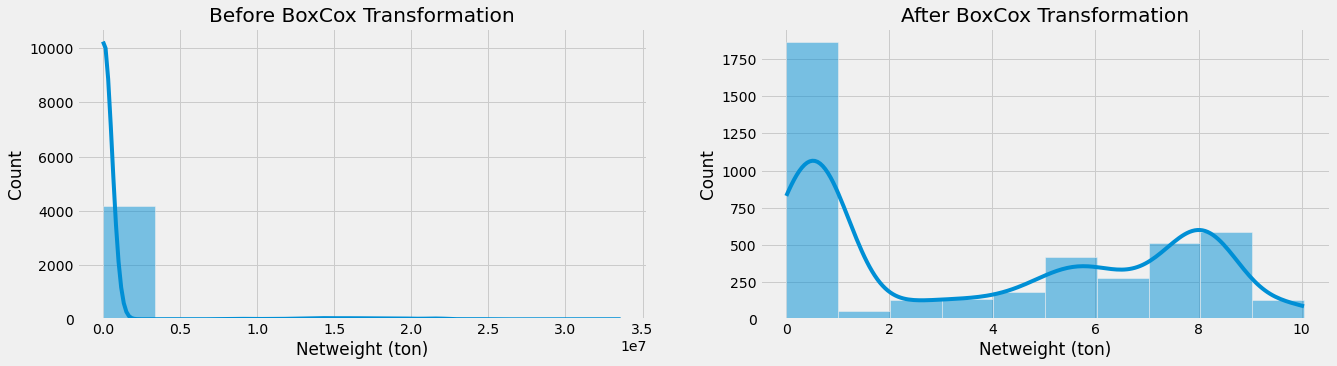

In [159]:
print('before skewness :', data['Netweight (ton)'].skew())
_, axs = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(data=data['Netweight (ton)'],ax=axs[0], kde=True, bins=10)
axs[0].set_title('Before BoxCox Transformation')
data['Netweight (ton)'] = data['Netweight (ton)']+1
transformed_ = boxcox(data['Netweight (ton)'])
data['Netweight (ton)'] = transformed_[0]
sns.histplot(data=data['Netweight (ton)'],ax=axs[1], kde=True, bins=10)
axs[1].set_title('After BoxCox Transformation')
lambda_netweight = transformed_[1]
print('after skewness :', data['Netweight (ton)'].skew())

##### Transforming categorical variable to numeric variable

In [160]:
# Trade Flow
data['Trade Flow'] = data['Trade Flow'].map({'Exports' : 0, 'Imports' : 1})

In [161]:
# Commodity
commodity_map = {j:i for i, j in enumerate(data['Commodity'].unique())}
data['Commodity'] = data['Commodity'].map(commodity_map)

In [162]:
data = data[['month_year', 'Commodity', 'Netweight (ton)', 'Aggregate Level', 'Is Leaf Code', 'Trade Flow', 'Trade Value (US$)']]
data = data.sort_values(by='month_year', axis=0)

In [163]:
data

,month_year,Commodity,Netweight (ton),Aggregate Level,Is Leaf Code,Trade Flow,Trade Value (US$)
0,2011-01,0,7.767139,4,0,1,-2.542746
31,2011-01,14,0.676628,2,0,1,1.082641
29,2011-01,15,0.676628,2,0,0,1.832338
23,2011-01,16,0.676628,2,0,1,-1.697284
22,2011-01,17,0.676628,2,0,1,-1.622456
...,...,...,...,...,...,...,...
4264,2022-02,16,0.000000,2,0,0,1.543722
4263,2022-02,17,0.000000,2,0,0,0.402139
4262,2022-02,4,2.748209,6,1,0,-5.701578
4276,2022-02,9,7.407595,6,1,0,-3.608070


now data is preprocessed and ready for model training.